# Predicting Log Error for Zillow

by David Schneemann

## Project Goal

My goal with this project is to identify Zillow's key drivers of logerror and to provide insight into why and how these factors are producing certain log errors. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to more accurately predict home values and log error moving forward.

## Project Description

At Zillow, the ability to predict logerror is essential for measuring the error of a home value prediction within this database.

In order to more accurately predict log error, we will analyze the attributes (features) of homes within a predetermined set of data. This dataset includes Single Family Properties that had a transaction during 2017.
We will then develop models for predicting log error based on these attributes and provide recommendations and predictions to Zillow for improving prediction of log error moving forward.


## Initial Questions

#### 1. Does a higher number of bedrooms increase logerror?

#### 2. Does a higher number of bathrooms increase logerror?

#### 3. Do more garage spaces increase logerror?

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### 5. Does a higher square footage increase home value?

## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Zillow.

In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

# Personal Imports
import acquire
import prepare
import explore
import model

| Variable      | Meaning |
| ----------- | ----------- |
| logerror      | The measured log error of a home       |
| home_value      | The total tax assessed value of the parcel       |
| bedrooms   | The total number of bedrooms in a home        |
| bathrooms      | The total number of bathrooms in a home       |
| garage_spaces      | The total number of car slots in a garage       |
| year_built      | The year the home was built       |
| age      | The age of the home       |
| location      | Location of a home by county      |
| sq_ft      | The total square feet of a home       |
| lot_sq_ft      | The total square feet of a property lot       |
| latitude   | Location using the latitudenal metric        |
| longitude      | Location using the longitudenal metric       |
| bath_bed_ratio      | Ratio of bathrooms to bedrooms of a home       |

## Acquire Zillow Data

##### We acquire our data by utilizing my acquire.py file.
This file pulls my selected features from properties_2017 and joins them with propertylandusetype and predictions_2017. \
We use these tables only to limit our selection to Single Family Residences with a transaction in 2017. \
Our resulting sql query returns 56,079 entries of data with the following attributes.

In [2]:
# Calling my acquire.py file and utilizing its function,assigning the output to df
df = acquire.wrangle_zillow()

## Prepare Zillow Data

##### We prepare our data by utilizing my prepare.py file.
This file:
- Handles null values
    - These null values represented less than 1% of our data, so I chose to drop these rows
- Converts some variables to integers for optimization
- Handles outliers
- Cleans variables, including dropping `taxamount` and renaming columns
- Includes feature engineering to encode location via `fips`
- Splits prepared df into train, validate, test, and associated dfs on x and y

Our resulting dataframes are ready for exploration and evaluation.

In [4]:
# Calling my prepare function and assigning the output to the following variables
df, train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = prepare.prep_zillow(df)

In [38]:
# Checking shape on our samples to confirm appropriate split
print('Total df shape: {}.'.format(df.shape))
print('Train shape: {}.'.format(train.shape))
print('Validate shape: {}.'.format(validate.shape))
print('Test shape: {}.'.format(test.shape))

Total df shape: (53063, 10).
Train shape: (29715, 11).
Validate shape: (12735, 11).
Test shape: (10613, 11).


## Set the Data Context

#### Note: Not all visuals, analysis, and work is shown within this Final Report. 
#### All my work, from start to finish, is available in my `working_notebook.ipynb` file for your reference.

Our acquired and prepared dataset contains information for 48,250 homes. \
    In the process of exploring this data and setting initial hypotheses, I created a figure plotting choice categorical variables with our target variable of `logerror`. Using this figure I determined potential correlation with each of the features stated in my initial hypotheses. The following exploration seeks to answer these questions.

## Exploratory Analysis
I now take each of my initial hypotheses in turn, answering them using visualizations and statistical analysis. \
I utilize an `explore.py` file in order to abstract repetitive code away from this Final Report. 

#### 1. Does a higher number of bedrooms increase logerror?

- Ho = More bedrooms translates to <= logerror
- Ha = More bedrooms translates to > logerror

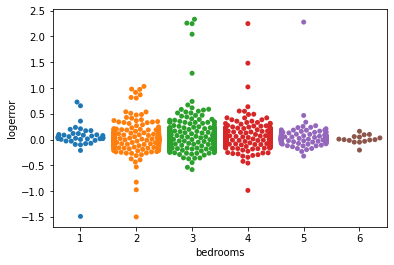

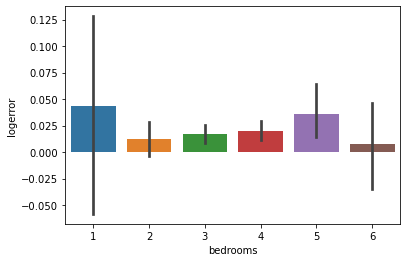

In [ ]:
# Calling explore.py; applying plot function to 'bedrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(df, 'bedrooms', 'logerror')

In [ ]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bed , p_bed = pearsonr(x = train['bedrooms'], y = train['logerror'])

r_bed , p_bed

if p_bed < alpha:
    print('The number of bedrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with logerror.')

The number of bedrooms is correlated with logerror.
The correlation coefficient is 0.038875245230531076.


#### Answer 1 : Yes,  higher numbers of bedrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bedrooms results in a higher logerror. Thus we move forward with this feature.

#### 2. Does a higher number of bathrooms increase logerror?

- Ho = More bathrooms translates to <= logerror
- Ha = More bathrooms translates to > logerror

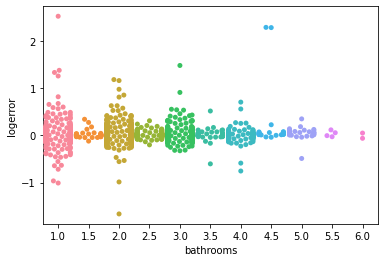

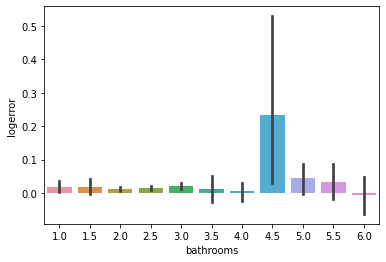

In [ ]:
# Calling explore.py; applying plot function to 'bathrooms' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'bathrooms', 'logerror')

In [ ]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_bath , p_bath = pearsonr(x = train['bathrooms'], y = train['logerror'])

r_bath , p_bath

if p_bath < alpha:
    print('The number of bathrooms is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with logerror.')

The number of bathrooms is correlated with logerror.
The correlation coefficient is 0.0352820776149596.


#### Answer 2: Yes,  higher numbers of bathrooms correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more bathrooms results in a higher logerror. Thus we move forward with this feature.

#### 3. Do more garage spaces increase logerror?

- Ho = More garage spaces translates to <= logerror
- Ha = More garage spaces translates to > logerror

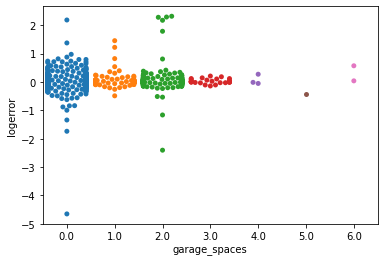

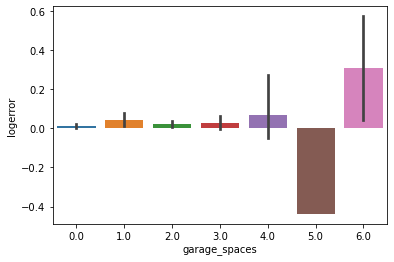

In [ ]:
# Calling explore.py; applying plot function to 'garage_spaces' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'garage_spaces', 'logerror')

In [ ]:
# Use the scipy stats function pearsonr to calculate the correlation coefficient and the p-value.
alpha = 0.05

r_garage , p_garage = pearsonr(x = train['garage_spaces'], y = train['logerror'])

r_garage , p_garage

if p_garage < alpha:
    print('The number of garage spaces is correlated with logerror.')
    print('The correlation coefficient is {}.'.format(r_garage))
else:
    print('The number of garage spaces is NOT correlated with logerror.')

The number of garage spaces is correlated with logerror.
The correlation coefficient is 0.021635652375575822.


#### Answer 3: Yes, higher numbers of garage spaces correlate with higher logerror
Following our statistical test, we indicate that this feature is correlated with logerror, meaning that there is statistical significance behind the claim that more garage spaces results in a higher logerror. Thus we move forward with this feature.

#### 4. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Ho = Population Means of the logerrors for Orange county, LA County, and Ventura County are all equal
- Ha = Population Means of the logerrors for Orange county, LA County, and Ventura County are NOT all equal

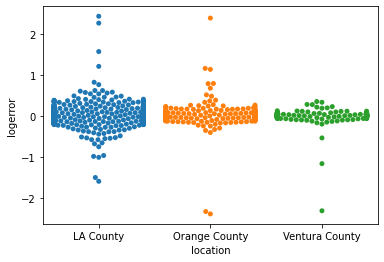

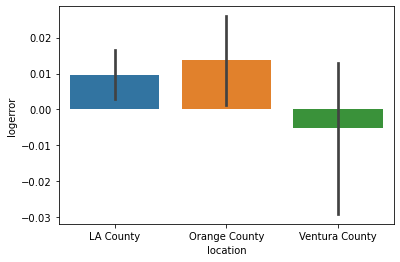

In [ ]:
# Calling explore.py; applying plot function to 'location' and 'home_value'
explore.plot_categorical_and_continuous_vars(train, 'location', 'logerror')

In [ ]:
# Assigning separate dfs to select only values within a certain county code
Orange = train[train.location == 'Orange County'].logerror
LA = train[train.location == 'LA County'].logerror
Ventura = train[train.location == 'Ventura County'].logerror

In [ ]:
# ANOVA test for comparing 3 separate cat vars
f, p = stats.f_oneway(Orange, LA, Ventura)
f, p

print(f'f-statistic by ANOVA Test: {f}, p-value: {p}')

# set alpha : 0.05
if p < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

f-statistic by ANOVA Test: 11.01573329874872, p-value: 1.6514954460181095e-05
We can reject the null hypothesis


#### Answer 4: Yes, location by county does affect logerror
Following our statistical test, we reject the null, meaning that there is statistical significance behind the claim that the population means of the logerror for each county are NOT equal. Thus we move forward with this feature.

### Summary: Which are the best predictors of log error?

#### Key Takeaways [EDIT]
##### All 5 features I explored have been shown to have correlation with home value, thus I'll move forward with these features to modeling:
- `bedrooms` 
- `bathrooms` 
- `garage_spaces` 
- `location` (aka `county_encoded` for modeling)
- `sq_ft` 

##### In an attempt to produce the most accurate models possible, I will drop the following extraneous features:
- `year_built`
- `lot_sq_ft`
- `decade_built`

In [ ]:
#INSERT CLUSTERING EXPLORATION

### Scaling
I have chosen a MinMax Scaler upon which to scale my data. After comparing this and other scalers, I determined MinMax to provide the best results. I call my `model.py` scaling function and assign respective variables below.

In [18]:
# Calling our model.py; Assigning df variables to our called function, `scale_data`
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test)

#### Now that we have our data scaled, I will:
- Remove the extraneous features mentioned in the exploration summary
- Split our scaled train, validate, and test on x and y

In [19]:
# Dropping extraneous features no longer relevant to modeling
train_scaled = train_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
validate_scaled = validate_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
test_scaled = test_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])

In [20]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF
x_train_scaled = train_scaled.drop(columns=['home_value'])
x_validate_scaled = validate_scaled.drop(columns=['home_value'])
x_test_scaled = test_scaled.drop(columns=['home_value'])

y_train_scaled = train_scaled['home_value']
y_validate_scaled = validate_scaled['home_value']
y_test_scaled = test_scaled['home_value']

In [ ]:
# INSERT CLUSTER CREATION

## Predicting Log Error
In fitting and evaluating models on our data, the metric we choose to use to evaluate is root mean square error (RMSE). This allows us to compare the mean error of a model in the actual unit of our target variable, logerror. Thus, this is the most valuable metric for understanding the performance of our models.


In [ ]:
# Dropping extraneous features no longer relevant to modeling
train_scaled = train_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
validate_scaled = validate_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])
test_scaled = test_scaled.drop(columns = ['location', 'lot_sq_ft', 'decade_built'])

**Note**
I now perform my scale split between x and y, following creation of my clusters

In [ ]:
# Splitting train, validate, and test dfs on x and y FOR SCALED DF with clusters
x_train_scaled = train_scaled.drop(columns=['logerror'])
x_validate_scaled = validate_scaled.drop(columns=['logerror'])
x_test_scaled = test_scaled.drop(columns=['logerror'])

y_train_scaled = train_scaled['logerror']
y_validate_scaled = validate_scaled['logerror']
y_test_scaled = test_scaled['logerror']

#### Dropping extraneous variables (tbd, whatever interrupts modeling)

#### Baseline
In order to compare our models, I'll create a baseline from our train dataset actual log error

In [21]:
#Establish baselines for the train and validation datasets
baseline = train['home_value'].mean()

# Create new columns for baseline
train['baseline'] = baseline
validate['baseline'] = baseline
test['baseline'] = baseline

# Find RMSE for each sample
train_rmse = sqrt(mean_squared_error(train['home_value'], train.baseline))
validate_rmse = sqrt(mean_squared_error(validate['home_value'], validate.baseline))
test_rmse = sqrt(mean_squared_error(test['home_value'], test.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(validate_rmse))
print('Test baseline RMSE: {}.'.format(test_rmse))

Train baseline RMSE: 272118.84506691294.
Validation baseline RMSE: 268096.9138598306.
Test baseline RMSE: 270460.22757535306.


I'll now create:
- `train_predictions` df for our train predictions 
- `predictions` df for our validate predictions

In [22]:
# Creating dfs for train and validate predictions
train_predictions = pd.DataFrame({
    'actual': train['home_value'],
    'baseline': baseline
}) 

predictions = pd.DataFrame({
    'actual': validate['home_value'],
    'baseline': baseline
}) 

### Fit 3 Best Models [EDIT]
- Linear Regression (`simple_lm`)
- Lasso-Lars Regression (`lasso_lars`)
- TweediRegressor (`glm`)

#### Fitting Linear Regression

In [23]:
# Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predicting on train and validate and adding column to both predictions dfs 
train_predictions['simple_lm'] = lm.predict(x_train_scaled)
predictions['simple_lm'] = lm.predict(x_validate_scaled)

#### Fitting Lasso-Lars Regression

In [24]:
# Create the model object
lars = LassoLars(alpha=1)

# Fit the model to our training data
lars.fit(x_train_scaled, y_train_scaled)

# predict train
train_predictions['lasso_lars'] = lars.predict(x_train_scaled)

# Predict validate
predictions['lasso_lars'] = lars.predict(x_validate_scaled)

#### Fitting TweediRegressor

In [25]:
# Create the model object
glm = TweedieRegressor(power=0, alpha=1)

# Fit the model to our training data
glm.fit(x_train_scaled, y_train_scaled)

# predict train, add to df
train_predictions['glm'] = glm.predict(x_train_scaled)

# Predict validate, add to df
predictions['glm'] = glm.predict(x_validate_scaled)

#### Evaluating Models using root mean squared error (RMSE)

In [26]:
# Calculate root mean squared error (RMSE) for every column in the train_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(train_predictions.actual, y_predicted))

print('Train baseline RMSE: {}.'.format(train_rmse))
train_predictions.apply(calculate_rmse).sort_values()

Train baseline RMSE: 272118.84506691294.


actual             0.000000
simple_lm     221910.865863
lasso_lars    221921.119966
glm           259201.362112
baseline      272118.845067
dtype: float64

In [27]:
# Calculate root mean squared error (RMSE) for every column in the predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(predictions.actual, y_predicted))

print('Validation baseline RMSE: {}.'.format(validate_rmse))
predictions.apply(calculate_rmse).sort_values()

Validation baseline RMSE: 268096.9138598306.


actual             0.000000
simple_lm     217319.455730
lasso_lars    217338.051334
glm           255170.615728
baseline      268096.913860
dtype: float64

##### Model Conclusion: 
Based on comparing our train and validate predictions, we can say with confidence that Linear Regression (`simple_lm`) is our best performing model. We will now predict and evaluate this model on our test dataset

### Predict and Evaluate Test dataset
Like with train and validate, I'll create a predictions df to collect predictions and then evaluate.

In [29]:
test_predictions = pd.DataFrame({
    'actual': test['home_value'],
    'baseline': baseline
}) 

In [30]:
#Create an instance of the model and fit it to my data
lm = LinearRegression().fit(x_train_scaled, y_train_scaled)

# Predict on test
test_predictions['simple_lm'] = lm.predict(x_test_scaled)

test_predictions.head()

,actual,baseline,simple_lm
21816,79477,377672.367962,399792.291476
29518,611458,377672.367962,611638.158403
49732,324879,377672.367962,215360.414827
41274,59652,377672.367962,278717.963066
47604,215371,377672.367962,395783.936060


In [31]:
# Calculate root mean squared error (RMSE) for the test_predictions df
def calculate_rmse(y_predicted):
    return sqrt(mean_squared_error(test_predictions.actual, y_predicted))

print('Test baseline RMSE: {}.'.format(test_rmse))
test_predictions.apply(calculate_rmse).sort_values()

Test baseline RMSE: 270460.22757535306.


actual            0.000000
simple_lm    222613.258374
baseline     270460.227575
dtype: float64

In [39]:
test_result = test_predictions.apply(calculate_rmse).sort_values()

In [34]:
# Finding by how much my model beat baseline 
model_percent = abs((test_result['simple_lm'] - test_rmse) / ((test_result['simple_lm'] + test_rmse) / 2))

print("The model beat baseline by: "+"{:.2%}".format(model_percent))

The model beat baseline by: 19.41%


**Success!** \
From this calculation on our test dataset, we can observe that my Linear Regression model successfully beat our baseline.

**Our model performs 19.5% better than baseline**

## Conclusion

### Summary

In seeking solutions to more accurately predict home value for Zillow, we have explored a multiplicity of factors in the dataset that affect home value. We have shown that some potential primary drivers of home value are :

- The number of bedrooms in a home
- The number of bathrooms in a home 
- The number of garage spaces in a home
- The location of a home by county
- The square footage of a home

The correlation of these features with home value, combined within our analysis and models, expresses confidence in the validity of our findings. We have created robust models that perform significantly better than our baseline estimated error of 270,460.

Having fit the best performing model to our train, validate, and test datasets, we expect this model to perform 19.5% better than our baseline in the future on data it has not seen, given no major changes to our data source.

### Recommendations

There are a number of recommendations that can be offered based on the above analysis. These suggestions are tied to the findings within our primary drivers of home value:

1. Based on our exploration of bedroom and bathroom counts, collecting additional data on how many rooms are in a home, including more specific data on living spaces versus kitchens and other spaces
2. Kitchen data, namely which major appliances and amenities are available in a given home. (ie. dishwasher, kitchen island, etc.)
3. In collecting more nuanced data about a home, I suggest we send out email surveys prompting home owners with limited data on their home in the Zillow database to provide additional details about their residence.

### Next Steps

Despite the overall effectiveness of our best-performing model, there is always room for improvement and optimization. \
If given more time to pursue a better results, I would begin by conducting further exploration and analysis of other features within our dataset. These features could include:
- Whether a home has a pool
- The square footage of the property, not just the home

In addition to exploring other features, I would look into methods for more appropriately separating our data into additional housing categories. For example:
- Calculating a ratio of home square footage against square footage of the entire property. This home to property ratio could be valuable.
- Narrowing a home's location to pinpoint the city and specific neighborhood a home is in. 

By optimizing our dataset to include the above categories, I believe we could increase the correlation of our feature set with home value and improve model prediction accuracy.